In [6]:
from pint.models import get_model
from pint.simulation import make_fake_toas_fromtim
from pint.logging import setup as setup_log
from pint.fitter import Fitter

from io import StringIO
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
import corner

from joblib import delayed, Parallel

In [3]:
setup_log(level="WARNING")

1

In [4]:
m = get_model("sim1.par")

In [8]:
def simulate_and_measure():
    setup_log(level="WARNING")
    
    t = make_fake_toas_fromtim("sim1.tim", m, add_noise=True)
    
    ftr = Fitter.auto(t, m)
    ftr.fit_toas()

    print (
        ftr.model.EFAC1.value,
        ftr.model.EFAC1.uncertainty_value,
        ftr.model.EQUAD1.value,
        ftr.model.EQUAD1.uncertainty_value
    )

    return (
        ftr.model.EFAC1.value,
        ftr.model.EFAC1.uncertainty_value,
        ftr.model.EQUAD1.value,
        ftr.model.EQUAD1.uncertainty_value
    )

In [10]:
results = Parallel(n_jobs=16)(delayed(simulate_and_measure)() for _ in range(500))

/home/abhimanyu/miniconda3/envs/pint-noise/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/abhimanyu/miniconda3/envs/pint-noise/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/abhimanyu/miniconda3/envs/pint-noise/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/abhimanyu/miniconda3/envs/pint-noise/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required f

1.4881566020063894 0.06793539354744106 1.1027148044770767 0.09950155262022584
1.5273181202038424 0.07295809488996854 1.119973904145485 0.10487039233794392
1.43599381654982 0.07110555677481471 1.197627733507059 0.11002111112182264
1.5843600754836147 0.06878357021222178 1.0367456890589657 0.09361544113534603
1.5606883121042434 0.0670309531852757 1.0574226460835248 0.09253447366462357
1.4957996979934458 0.06285842657231691 1.0458996181976816 0.09017816507837409
1.4420244655988745 0.06947212445983726 1.1683208662365903 0.10635410553919689
1.5319556844417725 0.07161900273479967 1.0693755113537047 0.10200665468559134
1.3955201369877313 0.07206256397906675 1.2195370757805277 0.11556682865113667
1.5383475725502973 0.06678734156670069 1.092662808317204 0.09387927530414587
1.4161023422947812 0.06468364888259094 1.13911298589725 0.09986359791446407
1.3942374752376478 0.07314404203470874 1.2719372711993364 0.11843863896914165
1.3940997855628483 0.06819675816772251 1.244597203134457 0.1091871179727

In [12]:
results = np.array(results)
efac_vals = results[:,0]
efac_errs = results[:,1]
equad_vals = results[:,2]
equad_errs = results[:,3]

# for idx in range(500):
#     if idx % 20 == 0:
#         print(idx)
    
#     t = make_fake_toas_fromtim("sim1.tim", m, add_noise=True)

#     ftr = Fitter.auto(t, m)
#     ftr.fit_toas()

#     efac_vals.append(ftr.model.EFAC1.value)
#     equad_vals.append(ftr.model.EQUAD1.value)
#     efac_errs.append(ftr.model.EFAC1.uncertainty_value)
#     equad_errs.append(ftr.model.EQUAD1.uncertainty_value)

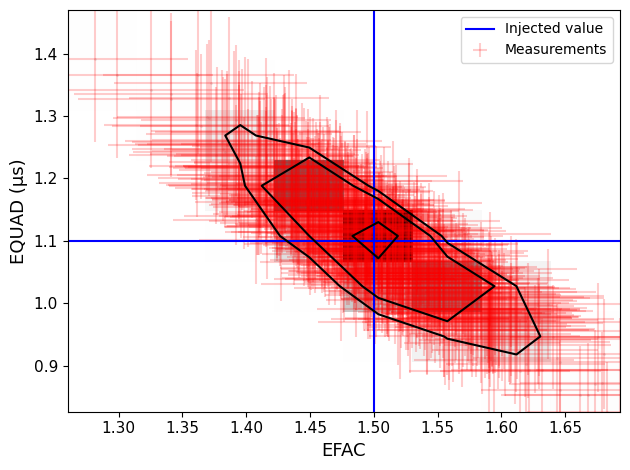

In [15]:
plt.errorbar(x=efac_vals, y=equad_vals, xerr=efac_errs, yerr=equad_errs, ls="", 
             label="Measurements", alpha=0.2, color="red")
plt.axvline(m.EFAC1.value, color="blue")
plt.axhline(m.EQUAD1.value, color="blue", label="Injected value")
corner.hist2d(np.array(efac_vals), np.array(equad_vals), bins=8, smooth=0.2)
plt.xlabel("EFAC", fontsize=13)
plt.ylabel("EQUAD (μs)", fontsize=13)
plt.tick_params(axis="both", labelsize=11)
plt.legend()
plt.tight_layout()
plt.savefig("sim1-multisim.pdf")